# A brief guide to the python visualizatiion landscape 
#### Mike Schaid PhD

*When, where, and what packages for data visualization in python*

The landscape of visualization packages in python is vast. With over a dozen packages to chose from, if you are new to python, it can feel overwhelming when you want to visualize your data. In this post I will provide some general guidelines when it comes to choosing which packages to use in your data visualization workflow.  This wont be a tutorial, but rather an overview of the most commonly used packages in the python community. We'll use an example scatter plot or variation of in each package, and contrast strengths and weakness. Finally, we'll wrap up with some suggestions of when and where to apply the packages discussed. For simplicity, we will be focusing on static visualizations. I do assume some basic understanding of pandas in this post, so feel free to brush up and return if needed. We'll be exploring 
<a href="https://www.kaggle.com/datasets/mathchi/diabetes-data-set">this clinical data set</a> from kaggle, focusing on epidemiological data as it pertains to adult diabetes. I've add some categorical data for plotting purposes. 

## Imports and default settings

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import plotly.express as px


%matplotlib inline 
plt.rcParams['figure.dpi'] = 400
sns.set(rc = {'figure.figsize':(2,2)})
plt.style.use('default')

## Import data from csv

In [66]:

data = pd. read_csv('/Users/michaelschaid/GitHub/Blog/dataviz/diabetes.csv')
diab =(
    data.mask(data==0).fillna(data.mean())
    .assign(weight_category = pd.cut(data.BMI,bins=[0,18.5,25,30,35,40,100],
                                            labels=['Underweight','Normal','Overweight','Obesity Class I',
                                            'Obesity Class II','Obesity Class III'], ordered=True),
            age_category = pd.cut(data.Age,bins=[18,25,65,100],
                                            labels=['Young Adult','Adult','Senior'], ordered=True),
            bp_category= pd.cut(data.BloodPressure, bins=[20.0,80.0,90.0,200.0],
                                            labels=['Normal','Eleveated','Hypertension'], ordered=True),
            disease_category=pd.cut(data.Outcome, bins=[-0.1,0.9,1.1], labels=['Healthy','Diabetic'], ordered=True)
                                            )      
)
diab=diab.dropna()
diab

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,weight_category,age_category,bp_category,disease_category
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1.000000,Obesity Class I,Adult,Normal,Diabetic
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0.348958,Overweight,Adult,Normal,Healthy
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1.000000,Normal,Adult,Normal,Diabetic
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.348958,Overweight,Young Adult,Normal,Healthy
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.000000,Obesity Class III,Adult,Normal,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0.348958,Obesity Class I,Adult,Normal,Healthy
764,2.000000,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0.348958,Obesity Class II,Adult,Normal,Healthy
765,5.000000,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0.348958,Overweight,Adult,Normal,Healthy
766,1.000000,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1.000000,Obesity Class I,Adult,Normal,Diabetic


---

First up, is the grandfather of python data visualization:

## Matplotlib

Matplotlib was developed by the late John D. Hunter, and now includes over 270 contributors. Frankly, it is a beast and for newcomers it can be daunting to figure out. Here is what you need to know: Matplotlib is the low-level foundational plotting package for python .Most static python packages are just higher-level wrappers for matplotlib. It can do anything you want when it comes to static plots. With this versatility comes complexity. There are many ways to accomplish the same task in matplotlib, and this is what makes it confusing for new users. We'll cover some of these details in future posts, so for now, just understand that it may take a little time to grasp and that's ok! I encourage everyone to spend a decent amount of time in the documentation, as it will improve not only your programmatic understanding of data visualization, but your python skills in general.
Lets have a look! Generating basic scatter plots is pretty straightforward:


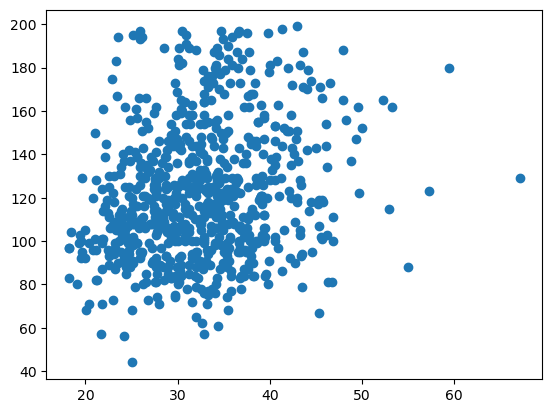

In [4]:
plt.scatter(x=diab['BMI'], y=diab['Glucose'])
plt.show()

Matplotlib provides some basic functionality for quick, but relatively unattractive plots. They aren't hideous, but they are pretty stock. That's, as I mentioned, the power lies in the ability to control every feature of the plot. It is worth mentioning that for most packages described in this post, you can change the default settings, but that's beyond the scope of this post. You can read more on it <a href="https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html">here</a>   Lets see how we can polish the default up a bit. Don't worry if you don't quite understand the syntax here.

Text(0, 0.5, 'Blood glucose (ng/dL)')

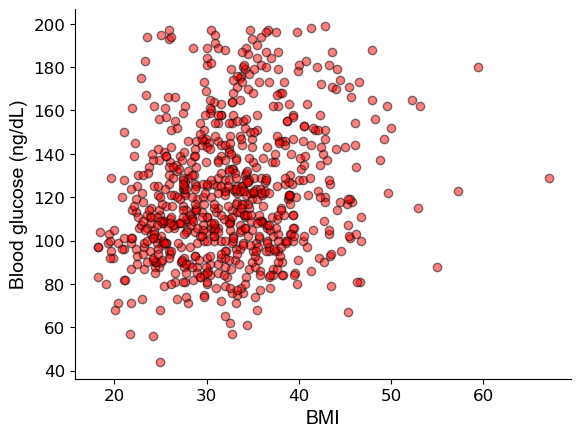

In [5]:
#initialize a figure
fig, ax = plt.subplots()

#plot the data
plt.scatter(x=diab['BMI'],
            y=diab['Glucose'],
            color='red',  
            edgecolor='black', 
            alpha=0.5)

#remove unwated top and right spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)


Great! This looks like something we might see in a paper, or at least is attractive enough we would be ok showing our collegues, but this is one plot. This isnt exactly proficient for visualizing our data quickly, and in way that we are comfortable sharing. Personally, I reserve matplot lib for making figures for maniscripts and journal articles.

 What about large datasets, with a lot of features that we want to see quickly, or basic statisical plots? This is exactly what seaborn was developed for. Lets make the same scatter plot and expand on it with seaborn. 

 ## Seaborn
 ---

Seaborn is one of the most popular data visualization packages in python. As mentioned in the intro, it is a high-level wrapper for matplotlib, which means we get abbreviated syntax but are still running matplotlib under the hood. In essence, seaborn was created to allow for rapid yet complex visualization. Lets replicate the same scatter plot we made with matplotlib and expand on it with seaborn.

<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

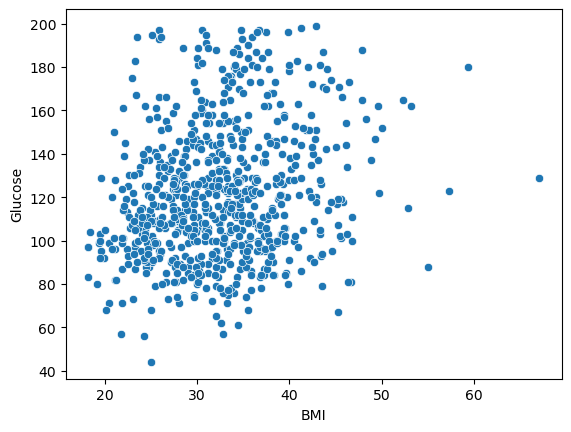

In [62]:
sns.scatterplot(x='BMI', y='Glucose', data=diab)



You can see a slight improvement from the matplotlib default. However, the functionality of seaborn allows us to generate a really nice figures that tell a story in just a couple lines. Lets look at an example scatter plot, but with a group aggreation for disease category.

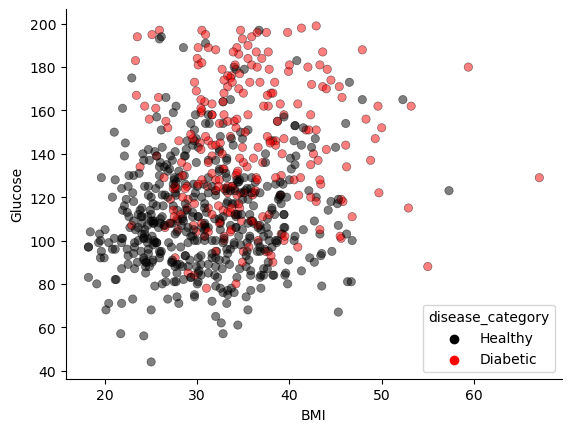

In [7]:
sns.scatterplot(data=diab, x='BMI', y='Glucose', hue='disease_category', 
                palette=['black', 'red'], edgecolor='black', alpha=0.5)
sns.despine()

Notice we didn't have to do anything to group our data-seaborn did it for us with the 'hue' parameter. This is exactly what seaborn was designed for! Great looking plots, that are generated quickly and intuitively. But, remember how I said seaborn is a wrapper for matplotlib? That means we can call matplotlib methods on our seaborn plots if we want to. Lets copy and paste our matplotlib syntax from the earlier plot to change the x and y labels.

Text(0, 0.5, 'Blood glucose (ng/dL)')

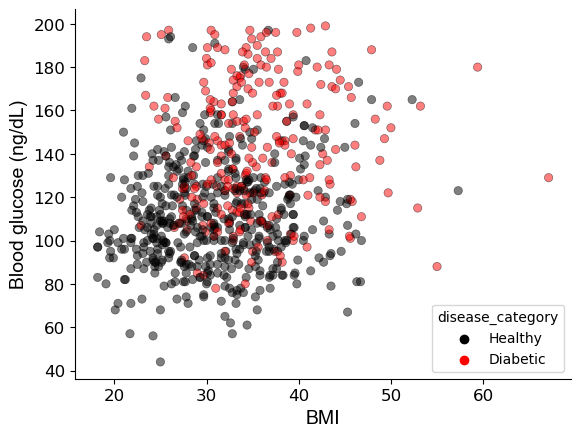

In [8]:
fig, ax = plt.subplots()

sns.scatterplot(data=diab, x='BMI', y='Glucose', hue='disease_category', 
                palette=['black', 'red'], edgecolor='black', alpha=0.5)
#remove unwated top and right spines
sns.despine()

# increase font size of tick labels
ax.tick_params(axis='both', labelsize=12)

# set x and y labels
ax.set_xlabel('BMI',font = "Arial", fontsize=14)
ax.set_ylabel('Blood glucose (ng/dL)', font = "Arial", fontsize=14)

Cool! We can use matplotlib methods on our seaborn objects. I suggest you review the seaborn documentation to get an idea of all of the possibilities of the package. Lets highlight one more thing before we continue. Seaborn can really speed up your exploratory analysis with categorical data, which can be more intensive when done in matplotlib. We can get really interesting insights in just few lines of code. If you are coming from R you are likely familiar with faceted plots, and seaborn can do that easily:

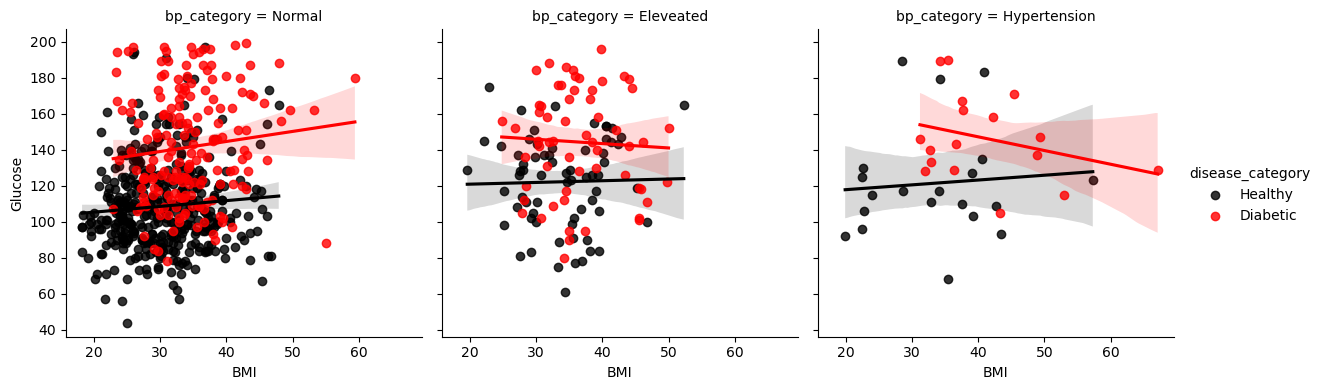

In [10]:

grid = sns.FacetGrid(diab, col='bp_category', hue='disease_category', height=4,
                     palette=['black', 'red'])
grid.map(sns.regplot, 'BMI', 'Glucose').add_legend()



We can see that seaborn has a lot of power for data visualization, but it cant be overstated that all of these plots are indeed achievable in matplotlib because they *are* matplotlib. Seaborn is just a tool to write shorter syntax and save you time. Its a great package and worth exploring. If you are new to python or data visualization in general you'll likely find it more intuitive for getting started with your visualizations.

## Plotnine
---
Plotnine is an interesting package. Just like seaborn, plotnine is a matplotlib wrapper, but with a twist. Plotnine is part of a greater ecosystem, that aims to mimic the R tidyverse in python. The idea is that it uses the same style of syntax as the popular R package, ggplot2, which is built upon the "grammer of graphics" logic popularized by Leland Wilkinson and implemented by Hadley Wickham in ggplot. We'll create a similar facetgrid as the one we made with seaborn for comparison, but with the classic ggplot aesthetics

/Users/michaelschaid/opt/anaconda3/envs/blog/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/michaelschaid/opt/anaconda3/envs/blog/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



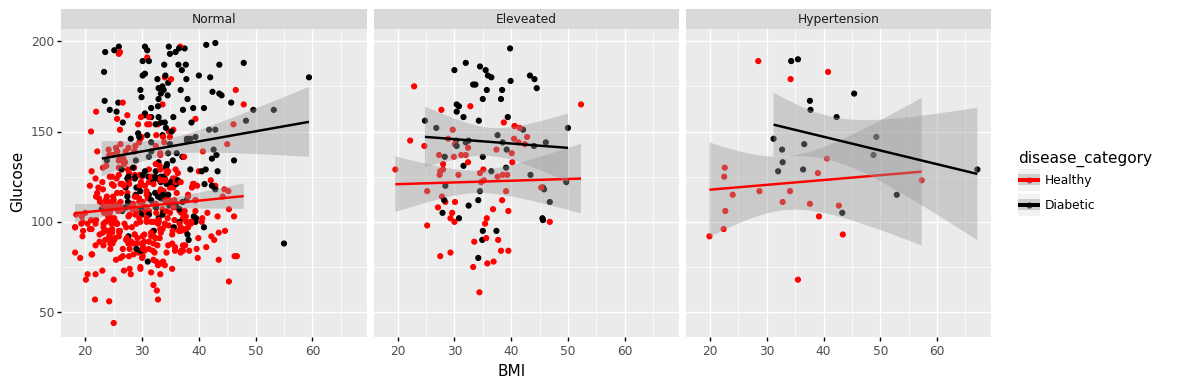

<ggplot: (8793611658715)>

In [68]:
grid= (ggplot(diab, aes('BMI', 'Glucose', color='disease_category'))
+ geom_point()
+ scale_color_manual(['red', 'black'])
+ stat_smooth(method='lm')
+ facet_wrap('~bp_category')
+ theme(figure_size=(12, 4))
 )
grid

# the error below is because there are some pandas operation in the plotnine code that need to be updated. 

We can see plotnine certainly has its advantages. Default plots are visually appealing, but a firm grasp of the grammar of graphics is required to get started. I left it with the standard ggplot2 theme so any R users can see that it really does a great job at replicating ggplot, but we can customize to aesthetics however we want. You can see that plotnine requires slightly more syntax than seaborn, but still less that base matplotlib. If you are coming from R you will likely find this package easy to onboard and get rolling. Python users may find the syntax a bit odd, but the <a href="https://plotnine.readthedocs.io/en/stable/">documentation</a> is pretty decent and I think its a great package.




## Pandas 
---

It may be surprising, but pandas, the common package for working with tabular data does indeed offer fairly extension plotting functionality. Plotting with pandas stands out is due to its its ability to plot data quickly with very low effort. Just like all the other packages we covered thus far, its default plotting backend is matplotlib (although this can be customized to utilize different a  backend- <a href="https://towardsdatascience.com/plotting-in-pandas-just-got-prettier-289d0e0fe5c0"> see this post</a>). Sticking with the scatter plots we'll highlight it here


<AxesSubplot:xlabel='BMI', ylabel='Glucose'>

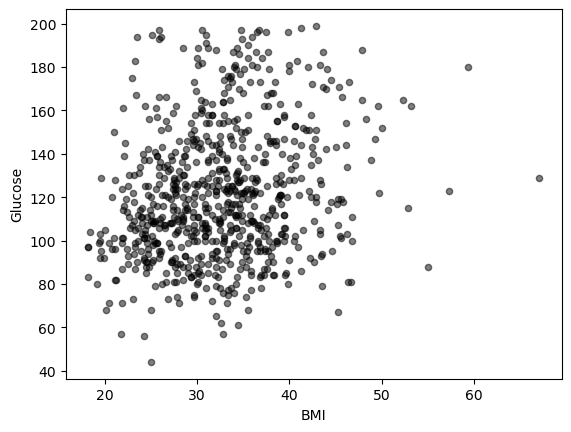

In [21]:
diab.plot(kind='scatter', x='BMI', y='Glucose',color='black', alpha=0.5)


Since we are using matplotlib in the backend we can also call matplotlib (and seaborn methods) on our pandas plots. Here's a simple example using both:

Text(0, 0.5, 'Glucose (ng/dL)')

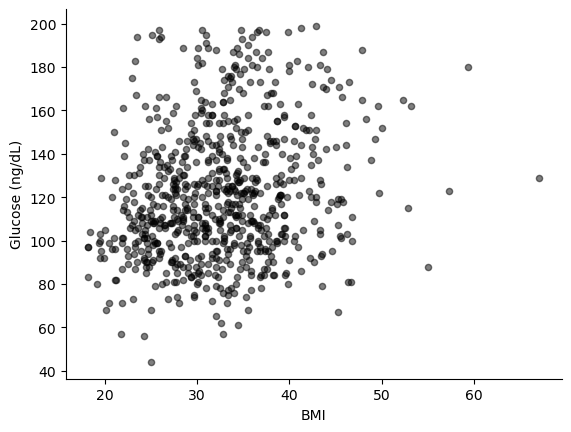

In [22]:
diab.plot(kind='scatter', x='BMI', y='Glucose',color='black', alpha=0.5)
sns.despine()
plt.ylabel('Glucose (ng/dL)')


This is great when you are doing extensive data wrangling with pandas and want to visualize as you go. One other cool pandas visualization trick is the ability to apply visualization to your dataframes in Jupyter notebooks using the style object (note that in this case, we are not using matplotlib). We wont cover this in detail here, but they are worth knowing about and super useful. Here's a visual of a correlation analysis:

In [28]:
styles = [dict(selector="caption",
            props=[("text-align", "left"),
                   ("font-size", "150%")])]
(diab.corr().style
.set_caption("Correlation between variables").set_table_styles(styles)
.background_gradient(axis=0, cmap="Reds")
)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.159244,0.258122,0.048197,-0.014305,0.089769,-0.006089,0.542750,0.247300
Glucose,0.159244,1.000000,0.222720,0.161745,0.403479,0.222619,0.136495,0.263017,0.486550
BloodPressure,0.258122,0.222720,1.000000,0.130800,0.007191,0.289230,0.001987,0.325947,0.168245
SkinThickness,0.048197,0.161745,0.130800,1.000000,0.230670,0.551572,0.153975,0.022866,0.187341
Insulin,-0.014305,0.403479,0.007191,0.230670,1.000000,0.194314,0.159158,0.037185,0.189667
BMI,0.089769,0.222619,0.289230,0.551572,0.194314,1.000000,0.156613,0.024689,0.303431
DiabetesPedigreeFunction,-0.006089,0.136495,0.001987,0.153975,0.159158,0.156613,1.000000,0.025966,0.186492
Age,0.542750,0.263017,0.325947,0.022866,0.037185,0.024689,0.025966,1.000000,0.249033
Outcome,0.247300,0.486550,0.168245,0.187341,0.189667,0.303431,0.186492,0.249033,1.000000


As you can see, we can use pandas to get a quick plot of our liking. Again, just like every other package we have seen, we wrap around matplotlib. Why did the pandas develops chose to do this? Well, you technically don't ever have to leave pandas to use it. And, if you don't care about aesthetics, you can plot are really basic plot with ~20 characters. Pretty neat.

The last package to mention here, is a nontraditional one when talking about static visualizations.

## Ploty 
---

Ploty is a package originally developed in JavaScript for creating interactive visualizations, but was recently developed as a python package. There are two flavors of Plotly- Plotly express, and Ploty graph objects (GO). The core purpose of Plotly is creating interactive figures (see this post for demonstration). I'm mentioning it here, however because plotly express offers a familiar syntax logic and can create really nice static images as well. We'll create a similar scatter plot as before so you can see the default comparison. We'll also add a "size " parameter that will alter the size of each point based on the 'Age" column.

In [61]:
fig = px.scatter(diab,
     x='BMI', y='Glucose', size='Age'
    color='disease_category',color_discrete_map= {'Diabetic': 'red', 'Healthy': 'black'},
    width=1000, height=800,)

fig.update_layout(
    font_size=20, 
    xaxis_title="BMI", 
    yaxis_title="Glucose (ng/dL)", 
    legend_title="Disease Category")

fig.show()

This can be really useful, as you can plot your data quickly, interact with it, then clean it up and save it as a static image for reports or publications, while also deploying it in notebooks or further into dashboards for interactive reports.

---

## How to chose to appropriate package
In python we have a lot of options, but if we are a new user, how do we know which ones we should use? You may be motivated to pick one package over the other based on default aesthetics, but one thing to realize is that all packages we highlighted here are highly customizable. With enough creatively, we can make identical plots with every package covered. There are some general guidelines for deciding which packages to use however, so here are my suggestions:

#### Matplotlib:
My personal bias is everyone should learn as much matplotlib as they can. There is a reason many of the alternative plotting packages are running matplotlib in the backend. It comes down to functionality and flexibility. However, where it starts to become required is under the context of a very specific aesthetic and detail you need to achieve. Further, if you are making complex multi-panel figures (especially for publication), matplotlib will be your best asset. 

#### Seaborn:
If you are in the early stages of exploratory data analysis, need to plot categorical data, or generate specific statistical plots, use seaborn. Don't forget you can easily pair it with matplotlib so you can rely on its simpler syntax when using matplotlib as your base. 
#### Pandas: 

If you are heavily using pandas and need to make a lot of figures quickly, and/or want to apply visuals to your dataframes use pandas. You can clean them up with matplotlib and call them into more complex visuals if needed. You can always change the backend and defaults if you wish. 
#### Plotnine: 

If you are coming from an extensive R background and you want to start plotting quickly, you can get off the ground running with plotnine. If you are a new python user, you can use plotnine to build your skill sets with grammar of graphics logic. Or, if you just prefer the syntax logic and want to use it, go for it! 
####Plotly: 

If you want to generate some interactive plots that can easily be exported into static plots use plotly!


---
We covered a lot here, so feel free to reach out if you have any questions or feedback. I hope this helps clear up some confusion in the python dataviz world!